### ABSTRACT:
#### This study aims to segment customers based on their purchase behavior using a decision tree algorithm. The dataset includes information such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country for each transaction.

#### After preprocessing the data and extracting relevant features (e.g., total purchase amount, frequency of purchases), a decision tree model is trained on a portion of the dataset and evaluated using metrics such as silhouette score and purity. The model is then used to segment customers into distinct groups based on their purchasing patterns.

#### The results show that the decision tree algorithm effectively segments customers into different groups based on their purchase behavior. Each segment can be analyzed to understand the unique characteristics and preferences of customers within that group. This segmentation approach can help businesses tailor their marketing strategies and offerings to different customer segments, thereby improving customer satisfaction and retention. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
df = pd.read_csv(r"C:\Users\DELL\MACHINE LEARNING\SUPERVISED LEARNING\Algorithm -Classification\DECISION TREE\OnlineRetail.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
df.shape

(541909, 8)

In [21]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [22]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
# Drop rows with missing values
df = df.dropna()

In [29]:
df.duplicated().sum()

5225

In [30]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [31]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

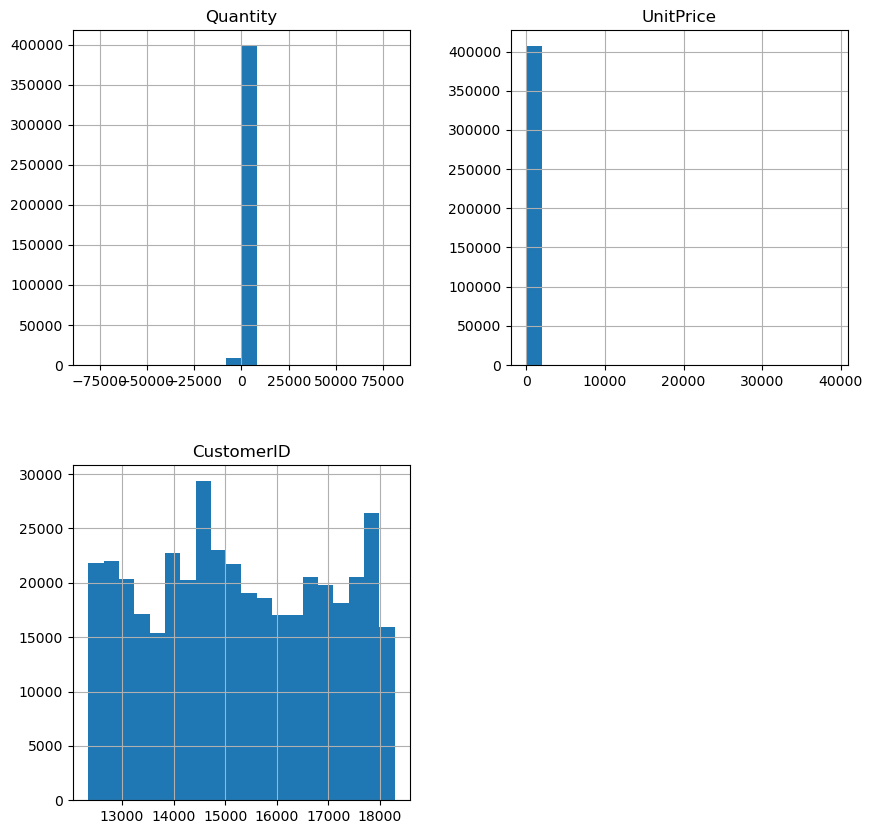

In [34]:
df.hist(bins=20,figsize=(10,10))

In [36]:
# Preprocessing
X = df[['Quantity', 'UnitPrice']]
# Define the target variable (e.g., customer segmentation)
y = df['Country']

In [37]:
from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Fit the classifier with training data
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,accuracy_score    
print(classification_report(y_test,y_pred))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

           Australia       0.32      0.06      0.10       229
             Austria       0.00      0.00      0.00        78
             Bahrain       0.00      0.00      0.00         5
             Belgium       0.58      0.03      0.05       413
              Brazil       0.00      0.00      0.00         7
              Canada       0.00      0.00      0.00        29
     Channel Islands       1.00      0.01      0.01       151
              Cyprus       0.00      0.00      0.00       122
      Czech Republic       0.00      0.00      0.00         2
             Denmark       0.30      0.03      0.06        91
                EIRE       0.37      0.02      0.04      1554
  European Community       0.00      0.00      0.00        13
             Finland       0.26      0.03      0.06       156
              France       0.32      0.00      0.01      1672
             Germany       0.42      0.04      0.07      1836
       

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.metrics import classification_report,accuracy_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8903227392276872


In [47]:
y_train_pred=dt.predict(X_train)
train_accuracy=accuracy_score(y_train,y_train_pred)
print(f'Training accuracy: {train_accuracy}')

Training accuracy: 0.892596086191057


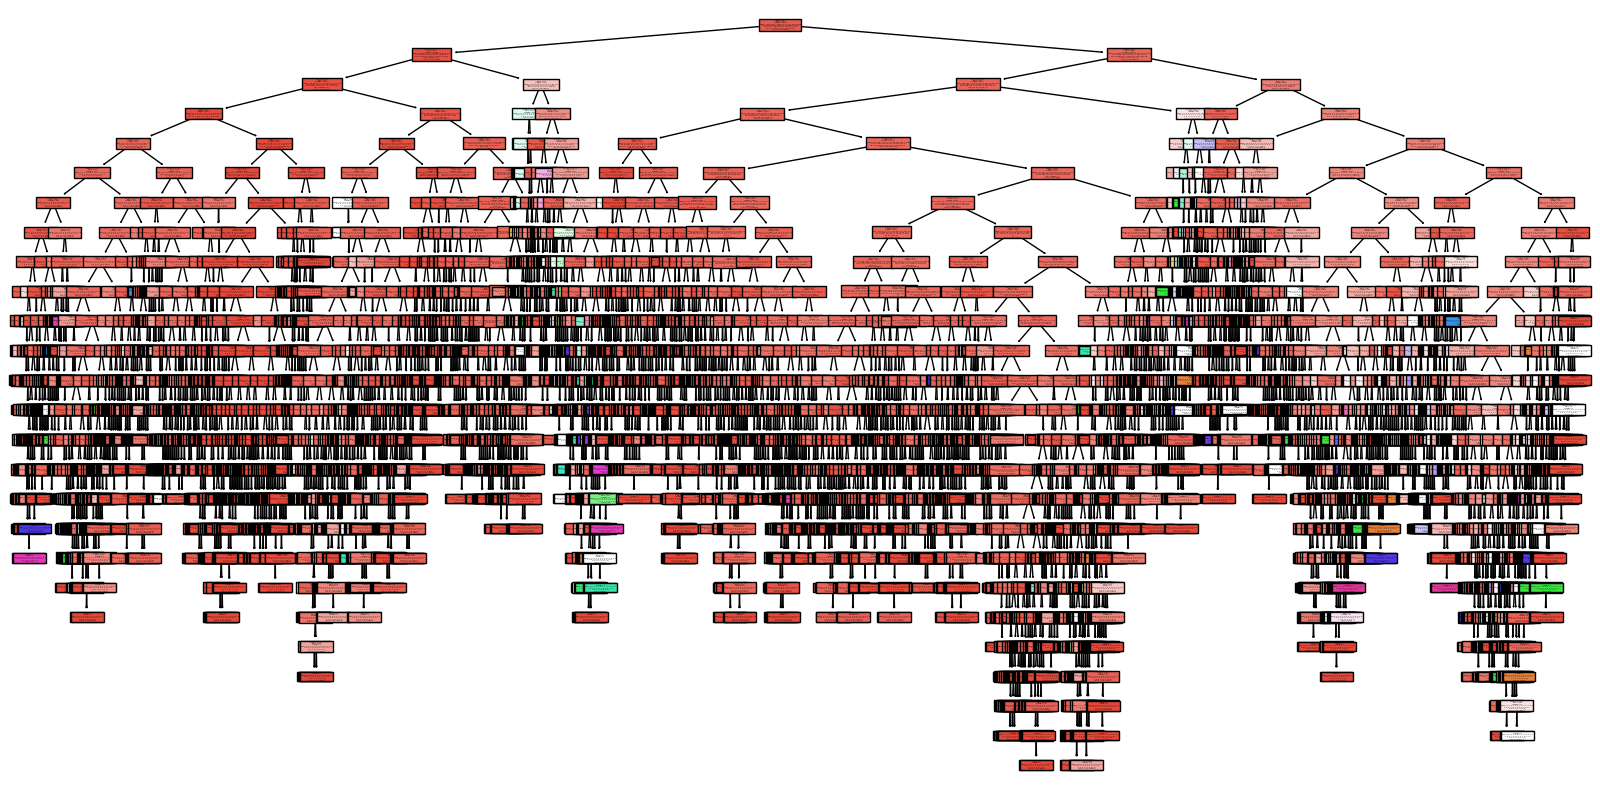

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the figure size (optional)
plot_tree(dt, filled=True, feature_names=X.columns, class_names=dt.classes_)
plt.show()

[Text(0.4869708485450874, 0.9807692307692307, 'x[0] <= 5.5\ngini = 0.207\nsamples = 325463\nvalue = [1030, 323, 12, 1656, 25, 122, 607, 500, 28, 298\n5931, 48, 539, 6819, 7659, 111, 148, 203, 625, 304\n34, 28, 107, 1906, 868, 277, 1159, 41, 8, 186\n2021, 367, 1518, 233, 55, 289466, 201]'),
 Text(0.26189925965980604, 0.9423076923076923, 'x[1] <= 16.975\ngini = 0.113\nsamples = 165977\nvalue = [206, 65, 3, 478, 7, 26, 198, 248, 5, 38, 1715\n14, 130, 1740, 2007, 30, 34, 52, 209, 85, 7, 0\n49, 218, 194, 84, 404, 21, 1, 23, 821, 59, 290\n122, 3, 156267, 124]'),
 Text(0.19125286681163592, 0.9038461538461539, 'x[1] <= 3.32\ngini = 0.104\nsamples = 164301\nvalue = [204, 55, 3, 465, 7, 25, 192, 237, 4, 32, 1619\n13, 98, 1501, 1706, 25, 34, 49, 194, 83, 7, 0\n46, 209, 172, 78, 372, 21, 1, 9, 772, 42, 269\n122, 2, 155509, 124]'),
 Text(0.11490693266857249, 0.8653846153846154, 'x[0] <= 0.0\ngini = 0.046\nsamples = 95217\nvalue = [92, 2, 0, 35, 0, 1, 10, 72, 4, 5, 243, 0, 7\n426, 404, 2, 3, 17, 17,

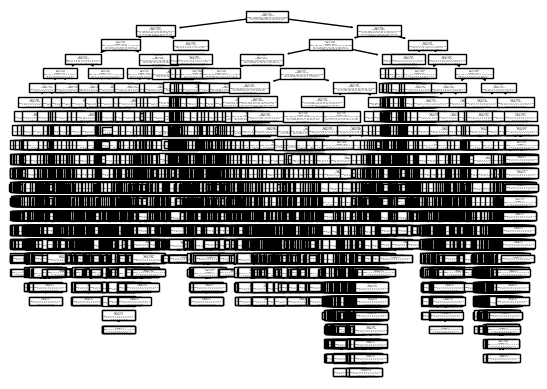

In [49]:
from sklearn import tree
tree.plot_tree(dt)

In [50]:
import joblib
joblib.dump(dt,'decision_tree_model2.joblib')

['decision_tree_model2.joblib']